In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
GENERATOR = [-1, 1]

def rand_vertex():
    '''
        возвращает массив рандомный массив длины 5 из 1 и -1
    '''
    vertex = []
    for i in range(5):
        vertex.append(GENERATOR[random.randint(0, 1)])
    return vertex

def generate(n):
    '''
        принмает длину стороны квадратной решетки
        возвращает рандомную решетку n x n
    '''
    # сделали массив
    grid = []
    for i in range(n):
        row = []
        for j in range(n):
            tmp = rand_vertex()
            row.append(tmp)
        grid.append(row)
    
    # tmp[0] - значение узла
    # tmp[1] - ребро слева 
    # tmp[2] - ребро сверху
    # tmp[3] - ребро справа
    # tmp[4] - ребро снизу
    
    # row : tmp[3] == tmp[1]
    for i in range(n):
        for j in range(1, n):
            # левое ребро равно правому следующей вершины
            grid[i][j - 1][3] = grid[i][j][1]
            
    # column : tmp[4] == tmp[2]
    for i in range(n):
        for j in range(1, n):
            # них текущей равен верху предыдущего
            grid[j - 1][i][4] = grid[j][i][2]
            
    # обойдем верх
    for i in range(n):
        grid[0][i][2] = 0
        
    # обойдем слева
    for i in range(n):
        grid[i][0][1] = 0
    
    # обойдем справа
    for i in range(n):
        grid[i][-1][3] = 0
        
    # обойдем низ
    for i in range(n):
        grid[-1][i][4] = 0
    
    return grid
    
def calculate(grid):
    '''
        принимает решетку
        возвращает ее энергию
    '''
    H = 0 
    n = len(grid)
    
    # row
    for i in range(n):
        for j in range(1, n):
            H -= grid[i][j - 1][0] * grid[i][j][0] * grid[i][j][1]
    
    # col
    for i in range(n):
        for j in range(1, n):
            H -= grid[j - 1][i][0] * grid[j][i][0] * grid[j][i][2]
    
    return H

def calculate_change(grid, i, j, H):
    '''
        считает энергию при изменении вершины
    '''
    cur_H = 0
    
    # предыдущая вершина * текущая вершина * ребро
    
    if grid[i][j][1] != 0:
        cur_H += grid[i][j - 1][0] * grid[i][j][0] * grid[i][j][1]
    
    if grid[i][j][2] != 0:
        cur_H += grid[i - 1][j][0] * grid[i][j][0] * grid[i][j][2]
    
    if grid[i][j][3] != 0:
        cur_H += grid[i][j + 1][0] * grid[i][j][0] * grid[i][j][3]
    
    if grid[i][j][4] != 0:
        cur_H += grid[i + 1][j][0] * grid[i][j][0] * grid[i][j][4]
        
    # print(cur_H)
    
    return H + 2 * cur_H

def change(grid, H, beta=0.3):
    '''
        принимаем решетку
        возвращаем измененную
    '''
    # val = calculate(_grid)

    n = len(grid)
    i, j = random.randint(0, n - 1), random.randint(0, n - 1)
    
    tmp = grid[i][j][0]
    
    new_H = calculate_change(grid, i, j, H)
    
    # print(new_H)
    
    if new_H < H:
        
        grid[i][j][0] = -tmp
        return grid, new_H
        #return grid, calculate(grid)

    else:
        
        p = np.exp(-beta * (new_H - H))
        grid[i][j][0] = random.choices([tmp, -tmp], weights=[1 - p, p])[0]
        
        # return grid, calculate(grid)

        if grid[i][j][0] == tmp:
            return grid, H
        else:
            return grid, new_H


def check(grid_a, grid_b):
    '''
        проверяет равны ли две матрицы
    '''
    n = len(grid_a)
    for i in range(n):
        for j in range(n):
            if grid_a[i][j][0] != grid_b[i][j][0]:
                return 0
    return 1

In [12]:
%%time

M = 100
N = 5

beta = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

ALL_DELTAS = []

MEAN_TIMES = []

# True если хотим выводить информацию (сильно замедляет)

SHOW = False

for b in beta:
    
    # if SHOW:
    print('\n BETA', b, '\n')
    
    TIMES = []

    for i in range(200):

        grid = generate(N)

        # найдем глобальный минимум 
        
        if SHOW:
            print('\n GRID =', i, '\n')

            print('\n STAGE 1\n')

        global_min = calculate(grid)
        global_min_grid = copy.deepcopy(grid)

        for j in range(10):

            tmp_grid = copy.deepcopy(grid)
            cur_H = calculate(grid)

            for j in range(1000):

                tmp_grid, cur_H = change(tmp_grid, cur_H, b) # beta

                if global_min > cur_H:

                    global_min = cur_H
                    global_min_grid = copy.deepcopy(tmp_grid)
                    
                    if SHOW:
                        print('current path', i ,'\nupdated global min grid =', global_min)
        
        if SHOW:
            print('\nmin global min =', global_min)

        # найдем локальный минимум
            print('\nSTAGE 2\n\n')

        local_min = calculate(grid)
        local_min_grid = copy.deepcopy(grid)

        tmp_grid = copy.deepcopy(grid)
        cur_H = calculate(tmp_grid)

        for i in range(1000):   

            tmp_grid, cur_H = change(tmp_grid, cur_H, b) # beta

            if local_min > cur_H:

                local_min = cur_H
                local_min_grid = copy.deepcopy(tmp_grid)
                
                if SHOW:
                    print('current path', i ,'\nupdated local min grid =', local_min)

        if SHOW:
            print('local min global =', local_min)

        # проверка на равенство
            print('\nSTAGE 3\n\n')

        chk = check(global_min_grid, local_min_grid)

        if chk:
            if SHOW:
                print('grids is equal, break')
            break

        if SHOW:
            print('grids is not equal\n')

        # если не равны, то пробуем дойти из одной в другую 
            print('\nSTAGE 4\n')

        local_min_grid_copy = copy.deepcopy(local_min_grid)
        
        # global_min_grid_copy = copy.deepcopy(global_min_grid)

        DELTAS = []

        for i in range(50):
            
            global_min_grid_copy = copy.deepcopy(global_min_grid)
            
            # local_min_grid_copy = copy.deepcopy(local_min_grid)

            cur_H = calculate(global_min_grid_copy)
            delta = cur_H 

            for j in range(5000):

                global_min_grid_copy, cur_H = change(global_min_grid_copy, cur_H, b) # beta

                if delta < cur_H:
                    delta = cur_H

                if check(global_min_grid_copy, local_min_grid_copy) == True:

                    DELTAS.append(delta)
                    
                    TIMES.append(j)

                    if SHOW:
                        print('came from global min grid to local min grid')

                        print('delta =', delta)
                    break

        if SHOW:
            print('\nDELTAS:\n')

        for delta in DELTAS:
            if SHOW:
                print(delta, end=' ')
        if SHOW:
            print()
        
        ALL_DELTAS.append(DELTAS)
        
    if TIMES:

        all_time = 0

        for time in TIMES:
            all_time += time

        res = 1 / b * np.log(all_time / len(TIMES))

        MEAN_TIMES.append(res)

    else:

        MEAN_TIMES.append(0)


 BETA 0.01 


 BETA 0.05 


 BETA 0.1 


 BETA 0.2 


 BETA 0.3 


 BETA 0.4 


 BETA 0.5 


 BETA 0.6 


 BETA 0.7 


 BETA 0.8 


 BETA 0.9 


 BETA 1 

Wall time: 1h 9min 11s


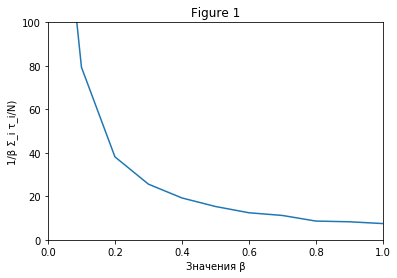

In [16]:
arr_for_plot = []
beta_x = []

for i in range(len(MEAN_TIMES)):
    if MEAN_TIMES[i] != 0:
        arr_for_plot.append(MEAN_TIMES[i])
        beta_x.append(beta[i])
        
plt.plot(beta_x, arr_for_plot)
plt.axis([0, 1, 0, 100])
plt.title('Figure 1')
plt.xlabel('Значения \u03B2')
plt.ylabel('1/\u03B2 \u03A3_i \u03C4_i/N)')
plt.show()